<h5>Descriptive Analysis</h5>

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AgglomerativeClustering
from transformers import AutoTokenizer, AutoModel
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import string
from wordcloud import WordCloud
from nltk import bigrams
from nltk.collocations import BigramAssocMeasures
from nltk.probability import FreqDist
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
# visualization
import pyLDAvis
import pyLDAvis.gensim_models
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import networkx as nx
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [5]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Practise').getOrCreate()

In [7]:
df_pyspark=spark.read.csv('bq-results-20230912-113230-1694518407919.csv',header=True,inferSchema=True)

In [13]:
df_pyspark.show()

+--------------------+--------------------+----+--------+-------------+-------------------+
|            filename|             content| SOM|location|call_duration|Ariadne_internal_ID|
+--------------------+--------------------+----+--------+-------------+-------------------+
|SOM_118_00513_FA1...|Herzlich willkomm...|NULL|    NULL|         NULL|               NULL|
|Ja o. k. da müsse...|                NULL|NULL|    NULL|         NULL|               NULL|
|Hatten sie sich a...|                NULL|NULL|    NULL|         NULL|               NULL|
|               O. k.|                NULL|NULL|    NULL|         NULL|               NULL|
|Dann also bei den...|                NULL|NULL|    NULL|         NULL|               NULL|
|Dann müsste müsst...|                NULL|NULL|    NULL|         NULL|               NULL|
|               Ja ja|                NULL|NULL|    NULL|         NULL|               NULL|
|Also wir gucken n...|                NULL|NULL|    NULL|         NULL|         

In [2]:
df = pd.read_csv('Topic data.csv')
df

,filename,content,SOM,location,call_duration,Ariadne_internal_ID
0,SOM_118_00513_FA163E622DEB-1a7e-e29da700-832c3...,Herzlich willkommen bei O sein uns am Apparat ...,SOM,118,513,FA163E622DEB-1a7e-e29da700-832c3-64e3520f-7cef...
1,SOM_118_00513_FA163E52FD32-1a7e-2da87700-aa52c...,Willkommen bei der O Kundenbetreuung sie sprec...,SOM,118,513,FA163E52FD32-1a7e-2da87700-aa52c-64e76b65-aec3...
2,SOM_118_00513_FA163ED88855-1b1d-62522700-9f3ab...,Herzlich Willkommen hier ist die DSL und Techn...,SOM,118,513,FA163ED88855-1b1d-62522700-9f3ab-64e5fe14-2206...
3,SOM_118_00514_FA163E622DEB-1a7e-e61e1700-87f84...,Hallo schönen guten Tag herzlich willkommen be...,SOM,118,514,FA163E622DEB-1a7e-e61e1700-87f84-64e5d698-d607...
4,SOM_118_00259_FA163E52FD32-1a7e-2da87700-a5517...,Willkommen bei O so langsam Apparat\nEs ging e...,SOM,118,259,FA163E52FD32-1a7e-2da87700-a5517-64e5eed0-89ea...
...,...,...,...,...,...,...
64530,SOM_VYD_-0001_FA163E56E95C-5e28-26ff4700-25e26...,Können sie mich hören hallo ja hallo ich habe ...,SOM,VYD,-1,FA163E56E95C-5e28-26ff4700-25e26-64e8d8b1-9987...
64531,SOM_VYD_-0001_FA163E52FD32-1a7e-3028c700-7a142...,Wunderschönen guten Tag und herzlich willkomme...,SOM,VYD,-1,FA163E52FD32-1a7e-3028c700-7a142-64e46468-1225...
64532,SOM_VYD_-0001_FA163E622DEB-1a7e-e41dd700-88d9b...,Ja hallo mein Name ist Ari guten sie mit so un...,SOM,VYD,-1,FA163E622DEB-1a7e-e41dd700-88d9b-64e70e8f-3d3a...
64533,SOM_VYD_-0001_FA163E44569D-1a89-b144b700-8492d...,Herr Müller sehr guten tag die Kollegin hat mi...,SOM,VYD,-1,FA163E44569D-1a89-b144b700-8492d-64e70077-5731...


In [3]:
# Check for missing data in the entire DataFrame
missing_data = df.isnull().sum()

# Print missing data counts for each column
print("Missing Data Counts:")
print(missing_data)


Missing Data Counts:
filename               0
content                0
SOM                    0
location               0
call_duration          0
Ariadne_internal_ID    0
dtype: int64


In [4]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [filename, content, SOM, location, call_duration, Ariadne_internal_ID]
Index: []


In [5]:
# Split the 'content' column into words and calculate word counts
df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))

# Calculate the average word count
average_word_count = df['word_count'].mean()

# Print the average word count
print("Average Word Count:", average_word_count)

# Calculate the average word count
average_word_count_median = df['word_count'].median()

# Print the average word count
print("Median Word Count:", average_word_count_median)


# Print the max word count
print("Max Word Count:", df['word_count'].max())

# Print the min word count
print("Min Word Count:", df['word_count'].min())



Average Word Count: 541.592221275277
Median Word Count: 405.0
Max Word Count: 6106
Min Word Count: 23


In [22]:
# Frequency counts for categorical columns
location_counts = df['location'].value_counts()

location_counts

location
VYD    15508
TPF     9448
LUB     5033
SKO     4917
CCX     4896
EPO     3990
CHS     3743
SLF     3339
CHO     2908
SJJ     2856
135     2140
CDA     1188
138      996
POT      892
AMV      861
141      573
118      444
NBS      388
NUE      344
SZW       71
Name: count, dtype: int64

In [6]:


# Find the text with the minimum number of words
min_word_count = df['word_count'].min()
min_word_text = df[df['word_count'] == min_word_count]['content'].values[0]

# Print the text with the minimum word count
print("Text with the Minimum Number of Words:")
print(min_word_text)

# Optionally, you can also print the word count for reference
print(f"Word Count: {min_word_count}")


Text with the Minimum Number of Words:
Schönen guten Tag und herzlich willkommen O Kundenservice mein Name ist Lorenz was darf ich für sie tun hallo o. k.
O. k.

Word Count: 23


In [23]:
som_counts = df['SOM'].value_counts()
som_counts

SOM
SOM    64535
Name: count, dtype: int64

In [24]:
df.describe()

,call_duration,word_count
count,64535.000000,64535.000000
mean,532.614132,541.592221
std,2872.453512,469.096331
min,-2693.000000,23.000000
25%,224.000000,231.000000
50%,405.000000,405.000000
75%,690.000000,696.000000
max,720346.000000,6106.000000


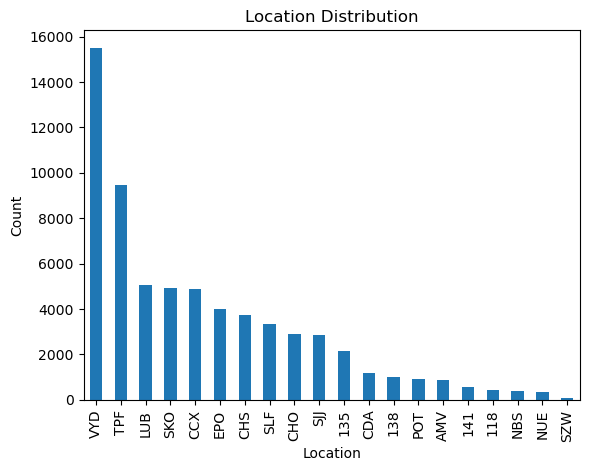

In [25]:
# Bar chart for location counts
location_counts.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')
plt.show()

In [26]:
# Load the spaCy German language model
nlp = spacy.load('de_core_news_sm')
# Create an empty list to store the updated text without proper names
updated_texts = []
# Iterate over the text column and remove proper names using spaCy
for text in df['content']:
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.pos_ != 'PROPN':
            tokens.append(token.text)
    updated_texts.append(' '.join(tokens))
# Update the 'text' column with the modified text
df['content'] = updated_texts

# Print the updated dataset
df.head()

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-p

,filename,content,SOM,location,call_duration,Ariadne_internal_ID,word_count
0,SOM_118_00513_FA163E622DEB-1a7e-e29da700-832c3...,Herzlich willkommen bei sein uns am Apparat wa...,SOM,118,513,FA163E622DEB-1a7e-e29da700-832c3-64e3520f-7cef...,802
1,SOM_118_00513_FA163E52FD32-1a7e-2da87700-aa52c...,Willkommen bei der Kundenbetreuung sie spreche...,SOM,118,513,FA163E52FD32-1a7e-2da87700-aa52c-64e76b65-aec3...,482
2,SOM_118_00513_FA163ED88855-1b1d-62522700-9f3ab...,hier ist die und Technik Abteilung ich bräucht...,SOM,118,513,FA163ED88855-1b1d-62522700-9f3ab-64e5fe14-2206...,905
3,SOM_118_00514_FA163E622DEB-1a7e-e61e1700-87f84...,schönen guten Tag herzlich willkommen bei ihne...,SOM,118,514,FA163E622DEB-1a7e-e61e1700-87f84-64e5d698-d607...,641
4,SOM_118_00259_FA163E52FD32-1a7e-2da87700-a5517...,Willkommen bei so langsam Apparat \n Es ging e...,SOM,118,259,FA163E52FD32-1a7e-2da87700-a5517-64e5eed0-89ea...,281


In [27]:
# Download the NLTK stop words list and wordnet for lemmatization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the Snowball stemmer and WordNet lemmatizer
stemmer = SnowballStemmer("german")  # Use the appropriate language for stemming
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('german'))  # Use the appropriate language
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove short words (length < 3 characters)
    tokens = [word for word in tokens if len(word) > 2]
    
    # Lemmatize or stem the words
    # Uncomment one of the following lines based on your choice
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the preprocessing function to the DataFrame
df['content'] = df['content'].apply(preprocess_text)

# Print the cleaned DataFrame
print(df['content'])


[nltk_data] Downloading package stopwords to C:\Users\Muhammad
[nltk_data]     Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Muhammad
[nltk_data]     Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Muhammad
[nltk_data]     Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        herzlich willkomm apparat tun muss mal guck ko...
1        willkomm kundenbetreu sprech darf tun dat stor...
2        technik abteil braucht kundennumm dat abgleich...
3        schon gut tag herzlich willkomm nam darf tun i...
4        willkomm langsam apparat ging halt rahm suppor...
                               ...                        
64530    hor gerad kolleg gesproch weitergeleitet deswe...
64531    wunderschon gut tag herzlich willkomm ausgezei...
64532    hallo nam ari gut wurd weitergeleitet indizier...
64533    herr gut tag kollegin gesagt problem rout korr...
64534    herr nam tun hallo person kundenkennzahl bitt ...
Name: content, Length: 64535, dtype: object


In [28]:
# Words to remove
words_to_remove = ['bitt', 'mal', 'schon', 'genau', 'dank', 'gut', 'tag', 'numm', 'person', 'kurz', 
                   'einfach', 'neu', 'schau', 'moment', 'sag', 'muss', 'geht', 'fall', 'ganz', 'war', 'gern', 'frag', 
                   'gleich',
                  'guck', 'imm', 'halt', 'wurd', 'seh', 'natur', 'quasi', 'gerad', 'bekomm', 'rout', 'gesagt', 'nein', 
                   'tun', 'syst',
                  'mehr', 'mocht', 'box', 'geh', 'zugangsdat', 'passwort', 'kennwort', 'steht','seit', 'klein', 'bekomm', 'rufnumm', 
                   'kundenkennzahl', 'leid', 'tun', 'nam', 'per', 'willkomm', 'herzlich', 'gemacht', 'bleib', 'herr',
                   'kolleg',
                   'schick', 'frau', 'geb', 'richtig', 'vielleicht', 'viel','kart', 'brot', 'brauch',
                  'erst', 'gibt', 'kommt', 'moglich',  'pro', 'iphon', 'sekund', 'minut', 'wirklich', 'krieg',
                   'tatsach', 'musst', 'weiss',  'darf', 'find', 'gar', 'probl' , 'nee', 'klar', 'tschuss', 'heut', 'uhr', 'anruf', 
                   'wunsch', 'dat' , 'hallo', 'kundig']

# Function to remove specified words from text
def remove_specific_words(text):
    # Tokenize the text
    tokens = text.split()
    
    # Filter out words to remove
    filtered_tokens = [word for word in tokens if word not in words_to_remove]
    
    # Join the remaining tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)
    
    return cleaned_text

# Apply the function to the 'cleaned_text' column
df['content'] = df['content'].apply(remove_specific_words)

# Print the cleaned DataFrame
df['content']


0        apparat konto sau aktuell stand ding gemeldet ...
1        kundenbetreu sprech storni raus bereit wahrung...
2        technik abteil braucht kundennumm abgleich buc...
3        internet haus funktioniert internet haus vertr...
4        langsam apparat ging rahm support kund gemeins...
                               ...                        
64530    hor gesproch weitergeleitet desweg hochgestuft...
64531    wunderschon ausgezeichnet wichtig technik grow...
64532    ari weitergeleitet indiziert adress postleitza...
64533    kollegin problem korrekt fehlermeld verstand k...
64534    worum rechnung ruf handynumm folgendermass fre...
Name: content, Length: 64535, dtype: object

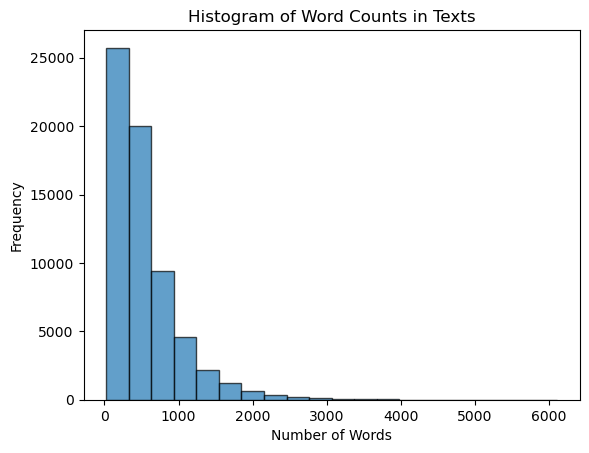

In [6]:
# Create a histogram of the word counts
plt.hist(df['word_count'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts in Texts')
plt.show()


C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


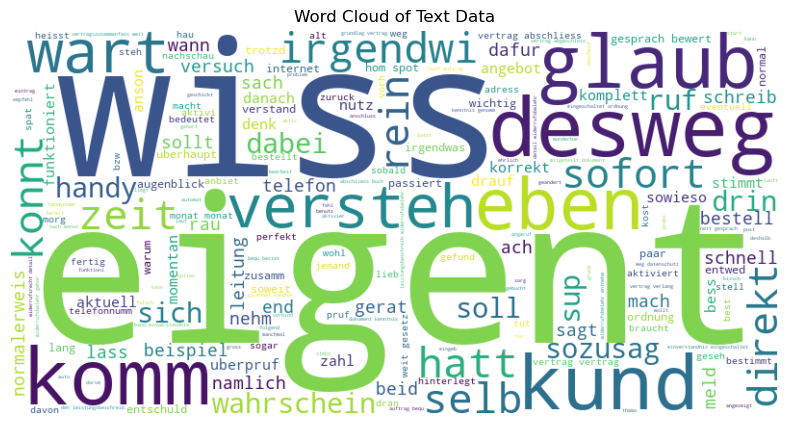

In [29]:
# Combine all text data into a single string
text_data = " ".join(df['content'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Text Data")
plt.show()


<h6>Topic Modeling</h6>

In [63]:
# Tokenize the text and create a dictionary
def tokenize(text):
    return text.split()

texts_content = [tokenize(text) for text in df['content']]

# Create a dictionary from the tokenized text
dictionary_content = corpora.Dictionary(texts_content)

# Create document-term matrices
corpus_content = [dictionary_content.doc2bow(text) for text in texts_content]

# Perform LDA
num_topics =5
lda_model_content = gensim.models.LdaModel(corpus=corpus_content, id2word=dictionary_content, num_topics=num_topics)

# Print topics for the 'content' DataFrame
print("Topics for the 'content' DataFrame:")
print(lda_model_content.print_topics(num_words=5))


Topics for the 'content' DataFrame:
[(0, '0.020*"technik" + 0.015*"internet" + 0.014*"leitung" + 0.011*"storung" + 0.010*"ticket"'), (1, '0.048*"vertrag" + 0.028*"rechnung" + 0.014*"monat" + 0.010*"kundennumm" + 0.010*"end"'), (2, '0.028*"vertrag" + 0.028*"monat" + 0.028*"tarif" + 0.017*"rabatt" + 0.016*"angebot"'), (3, '0.010*"link" + 0.008*"vertrag" + 0.008*"adress" + 0.008*"post" + 0.008*"formular"'), (4, '0.015*"handy" + 0.010*"eigent" + 0.007*"irgendwi" + 0.007*"eben" + 0.006*"funktioniert"')]


In [64]:
# Evaluation
# Compute Perplexity
print('\nContent Perplexity: ', lda_model_content.log_perplexity(corpus_content))  
# a measure of how good the model is. lower the better.


Content Perplexity:  -7.242235984175248


In [65]:
# Compute Coherence Score for lda_model_content
coherence_model_content = CoherenceModel(model=lda_model_content, texts=texts_content, dictionary=dictionary_content, coherence='c_v')
coherence_content = coherence_model_content.get_coherence()
print('\nContent Coherence Score: ', coherence_content)



Content Coherence Score:  0.40997002968523555


In [51]:
# Assuming you have already imported the necessary libraries and defined lda_model_content, corpus_content, and dictionary_content

# Enable notebook mode (if you're using a Jupyter notebook)
pyLDAvis.enable_notebook()

# Prepare and display the visualization
vis_content = gensimvis.prepare(lda_model_content, corpus_content, dictionary_content)
vis_content


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.132276  0.070278       1        1  35.489782
1     -0.102555  0.102108       2        1  22.296231
4     -0.047204 -0.010060       3        1  16.660807
3     -0.066893 -0.095175       4        1  15.106036
0      0.084376 -0.067150       5        1  10.447144, topic_info=          Term           Freq          Total Category  logprob  loglift
1437  rechnung   30982.000000   30982.000000  Default  30.0000  30.0000
979      monat   73280.000000   73280.000000  Default  29.0000  29.0000
278    technik   28027.000000   28027.000000  Default  28.0000  28.0000
102      tarif   64664.000000   64664.000000  Default  27.0000  27.0000
172    vertrag  134378.000000  134378.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
515       wann    3655.483260   21330.047717   Topic5  -5.3040   0.4950
27      eigent    3436.563418   33193.345318   Topic5  -5.3657  -0.0090
537     bewert    3312.383007   32363.893763   Topic5  -5.4025  -0.0205
487     rabatt    3273.233588   39146.456001   Topic5  -5.4144  -0.2227
355       wart    3219.699207   32429.392713   Topic5  -5.4309  -0.0509

[469 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1413      2  0.999189      abbruch
1832      1  0.008897       abbuch
1832      4  0.004791       abbuch
1832      5  0.986242       abbuch
6484      1  0.020626    abgebucht
...     ...       ...          ...
520       1  0.199483  zweihundert
520       2  0.790470  zweihundert
520       3  0.000861  zweihundert
520       4  0.006028  zweihundert
520       5  0.003157  zweihundert

[1393 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 4, 1])

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


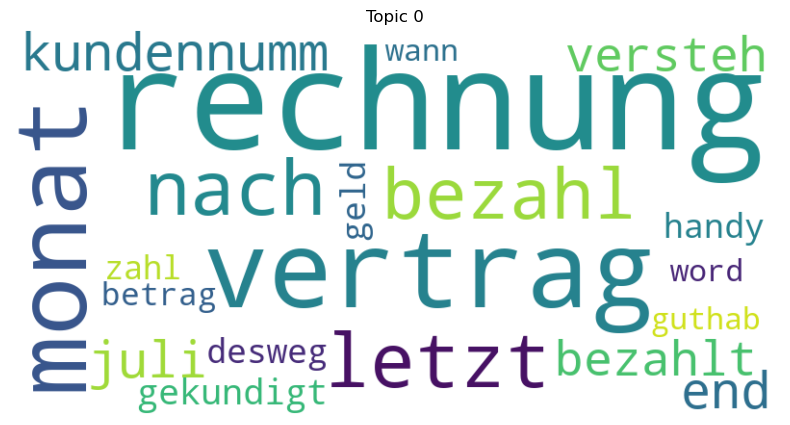

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


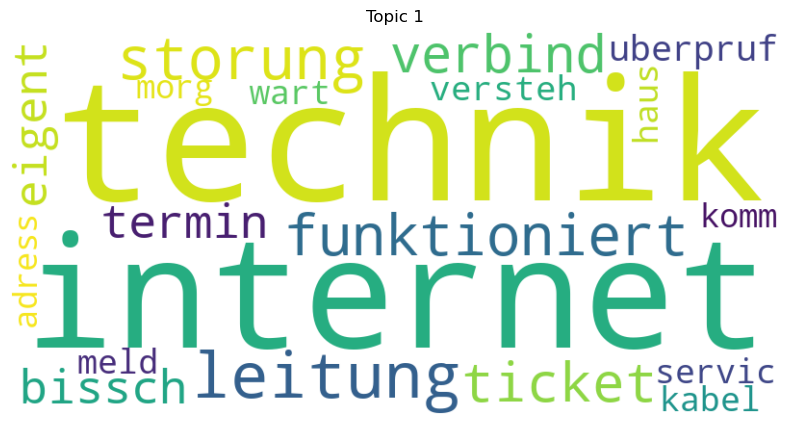

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


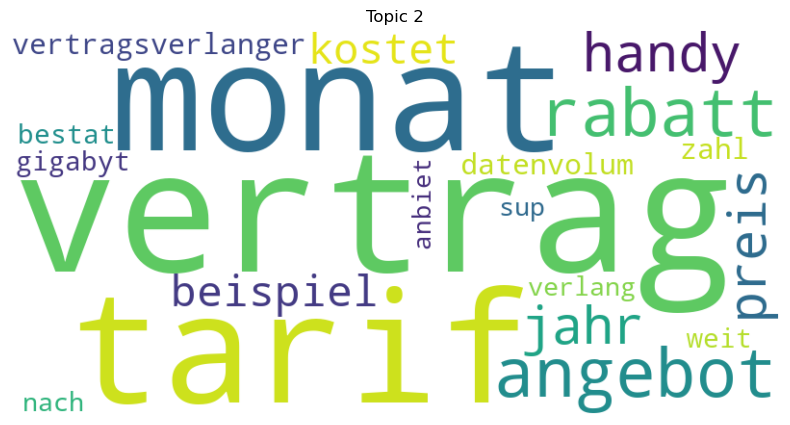

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


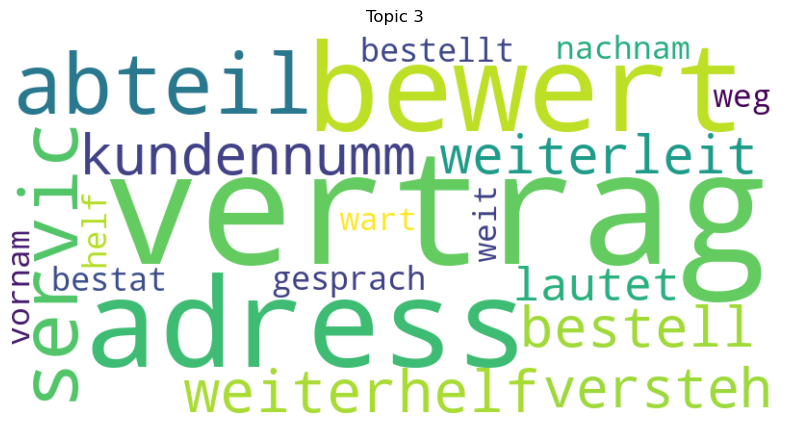

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


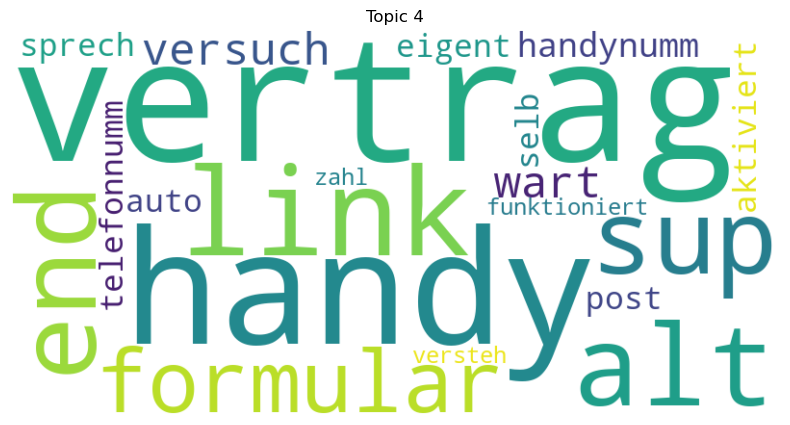

In [53]:
# Create a function to generate and display word clouds for each topic
def generate_word_clouds(lda_model, num_topics):
    for topic_num in range(num_topics):
        words = lda_model.show_topic(topic_num, topn=20)  # Get the top 20 words for each topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Topic {topic_num}")
        plt.axis("off")
        plt.show()

# Assuming you have already defined lda_model_content and num_topics
generate_word_clouds(lda_model_content, num_topics)


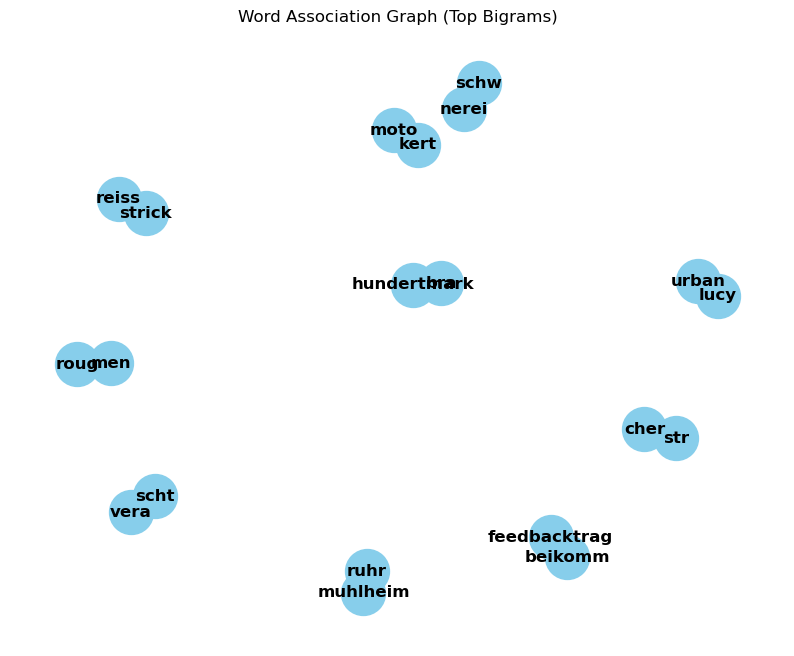

In [57]:
# Assuming you have a list of tokenized texts stored in 'texts_content'
# Join the tokens back into sentences
sentences = [' '.join(tokens) for tokens in texts_content]

# Tokenize the sentences again (if needed)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

# Create a BigramCollocationFinder
finder = BigramCollocationFinder.from_documents(tokenized_sentences)

# Set the association measure (you can adjust this)
bigram_measures = BigramAssocMeasures()
finder.apply_freq_filter(5)  # Adjust the frequency filter as needed

# Get the top bigrams
top_bigrams = finder.nbest(bigram_measures.pmi, 10)  # You can change the number of top bigrams

# Create a graph to represent word associations
G = nx.Graph()

# Add nodes and edges for the bigrams
for bigram in top_bigrams:
    word1, word2 = bigram
    G.add_node(word1)
    G.add_node(word2)
    G.add_edge(word1, word2)

# Create a figure and axis explicitly
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Define layout for the nodes
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000, node_color='skyblue', font_color='black', font_weight='bold', ax=ax)
plt.title("Word Association Graph (Top Bigrams)")
plt.show()
